# Time series analysis of Seattle bicycle counts

In [1]:
# I will be using Numpy, Pandas, and Matplotlib libraries to work with Python 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the data

In [2]:
url = '/Users/sm/Documents/Time-Series-Analysis/PDSHB_TSA/Fremont_Bridge_Bicycle_Counter_20240710.csv'
data = pd.read_csv(url, index_col='Date', parse_dates=False)
data.head(10)

,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk"
Date,,,
10/02/2012 01:00:00 PM,55.0,7.0,48.0
10/02/2012 02:00:00 PM,130.0,55.0,75.0
10/02/2012 03:00:00 PM,152.0,81.0,71.0
10/02/2012 04:00:00 PM,278.0,167.0,111.0
10/02/2012 05:00:00 PM,563.0,393.0,170.0
10/02/2012 06:00:00 PM,381.0,236.0,145.0
10/02/2012 07:00:00 PM,175.0,104.0,71.0
10/02/2012 08:00:00 PM,86.0,51.0,35.0
10/02/2012 09:00:00 PM,63.0,35.0,28.0


## Reset index to datetime data type

In [3]:
data.index

Index(['10/02/2012 01:00:00 PM', '10/02/2012 02:00:00 PM',
       '10/02/2012 03:00:00 PM', '10/02/2012 04:00:00 PM',
       '10/02/2012 05:00:00 PM', '10/02/2012 06:00:00 PM',
       '10/02/2012 07:00:00 PM', '10/02/2012 08:00:00 PM',
       '10/02/2012 09:00:00 PM', '10/02/2012 10:00:00 PM',
       ...
       '06/30/2024 02:00:00 PM', '06/30/2024 03:00:00 PM',
       '06/30/2024 04:00:00 PM', '06/30/2024 05:00:00 PM',
       '06/30/2024 06:00:00 PM', '06/30/2024 07:00:00 PM',
       '06/30/2024 08:00:00 PM', '06/30/2024 09:00:00 PM',
       '06/30/2024 10:00:00 PM', '06/30/2024 11:00:00 PM'],
      dtype='object', name='Date', length=102947)

In [4]:
data.index = pd.to_datetime(data.index, format='%m/%d/%Y %I:%M:%S %p')
data.index

DatetimeIndex(['2012-10-02 13:00:00', '2012-10-02 14:00:00',
               '2012-10-02 15:00:00', '2012-10-02 16:00:00',
               '2012-10-02 17:00:00', '2012-10-02 18:00:00',
               '2012-10-02 19:00:00', '2012-10-02 20:00:00',
               '2012-10-02 21:00:00', '2012-10-02 22:00:00',
               ...
               '2024-06-30 14:00:00', '2024-06-30 15:00:00',
               '2024-06-30 16:00:00', '2024-06-30 17:00:00',
               '2024-06-30 18:00:00', '2024-06-30 19:00:00',
               '2024-06-30 20:00:00', '2024-06-30 21:00:00',
               '2024-06-30 22:00:00', '2024-06-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=102947, freq=None)

### Rename the columns

In [5]:
data.columns

Index(['Fremont Bridge Sidewalks, south of N 34th St',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk',
       'Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk'],
      dtype='object')

In [6]:
data.columns = ['Total', 'West', 'East']

In [7]:
data.columns

Index(['Total', 'West', 'East'], dtype='object')

In [8]:
data.head()

,Total,West,East
Date,,,
2012-10-02 13:00:00,55.0,7.0,48.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 17:00:00,563.0,393.0,170.0


## Check and clean the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102947 entries, 2012-10-02 13:00:00 to 2024-06-30 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Total   102919 non-null  float64
 1   West    102919 non-null  float64
 2   East    102919 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


In [10]:
data.describe()

,Total,West,East
count,102919.000000,102919.000000,102919.000000
mean,105.726678,45.540386,60.186292
std,131.828673,59.811079,81.791663
min,0.000000,0.000000,0.000000
25%,13.000000,5.000000,7.000000
50%,59.000000,26.000000,32.000000
75%,144.000000,62.000000,79.000000
max,1097.000000,667.000000,850.000000


In [11]:
data.isnull().sum()

Total    28
West     28
East     28
dtype: int64

In [12]:
data[data.isnull().any(axis=1)]

,Total,West,East
Date,,,
2013-03-10 02:00:00,NaN,NaN,NaN
2013-06-14 09:00:00,NaN,NaN,NaN
2013-06-14 10:00:00,NaN,NaN,NaN
2014-03-09 02:00:00,NaN,NaN,NaN
2015-03-08 02:00:00,NaN,NaN,NaN
2015-04-21 11:00:00,NaN,NaN,NaN
2015-04-21 12:00:00,NaN,NaN,NaN
2015-04-21 13:00:00,NaN,NaN,NaN
2016-03-13 02:00:00,NaN,NaN,NaN


In [13]:
# Clean the data by removing rows with missing data

data_clean = data.dropna()

In [14]:
# Check if the new data is clean

data_clean.isnull().sum()

Total    0
West     0
East     0
dtype: int64

In [15]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102919 entries, 2012-10-02 13:00:00 to 2024-06-30 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Total   102919 non-null  float64
 1   West    102919 non-null  float64
 2   East    102919 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


## Data Visualization

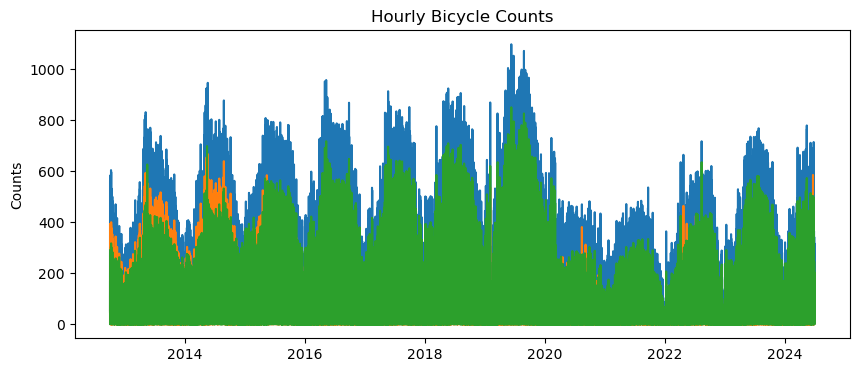

In [29]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(data_clean)
ax.set_ylabel('Counts')
ax.set_title('Hourly Bicycle Counts')
plt.show()

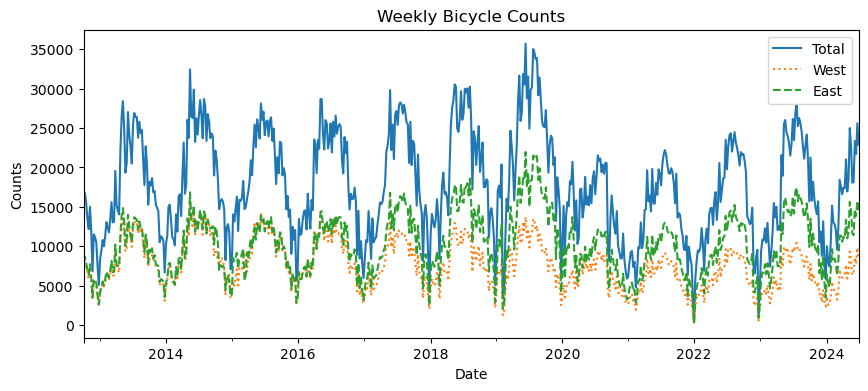

In [30]:
fig, ax = plt.subplots(figsize=(10, 4))

weekly = data_clean.resample('W').sum()
weekly.plot(ax=ax, style=['-', ':', '--'])
ax.set_ylabel('Counts')
ax.set_title('Weekly Bicycle Counts')
plt.show()

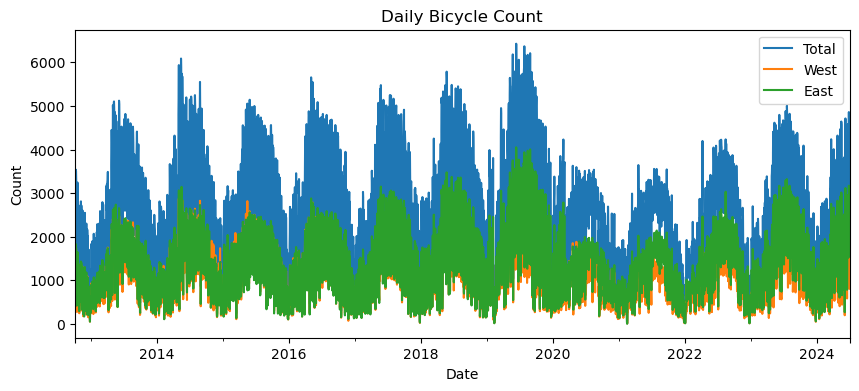

In [32]:
fig, ax = plt.subplots(figsize=(10, 4))

daily = data_clean.resample('D').sum()
daily.plot(ax=ax)
ax.set_ylabel('Count')
ax.set_title('Daily Bicycle Count')
plt.show()

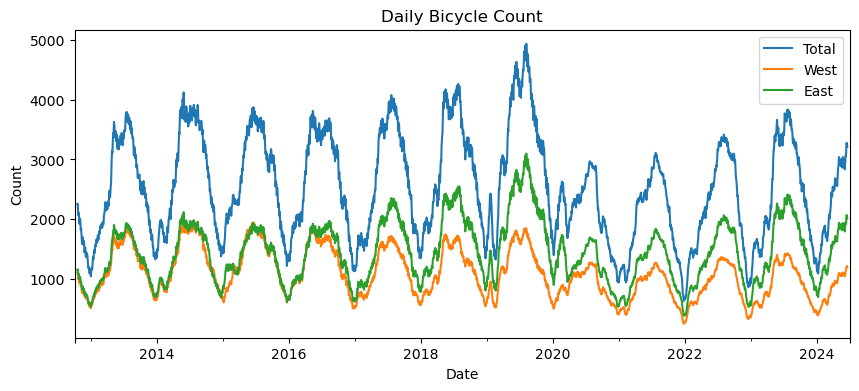

In [33]:
# We can get cleaner graphs, if we smooth the daily data by applying rolling window function.

fig, ax = plt.subplots(figsize=(10, 4))

daily = data_clean.resample('D').sum()
daily.rolling(30, center=True).mean().plot(ax=ax)
ax.set_ylabel('Count')
ax.set_title('Daily Bicycle Count')
plt.show()

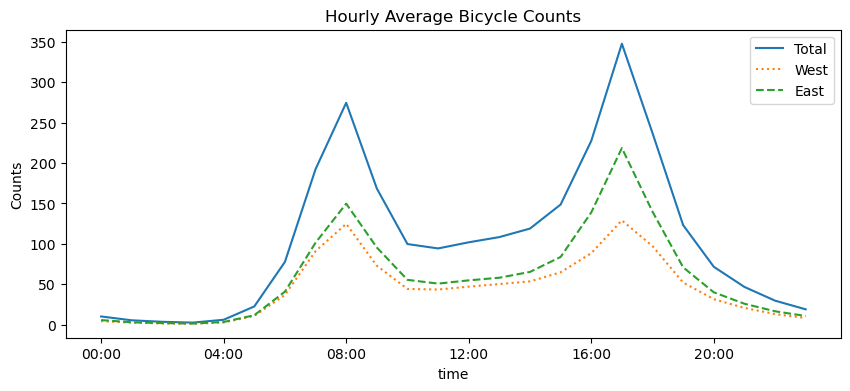

In [36]:
fig, ax = plt.subplots(figsize=(10, 4))

day_time_data = data_clean.groupby(data_clean.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
day_time_data.plot(ax=ax, xticks=hourly_ticks, style=['-', ':', '--'])
ax.set_title('Hourly Average Bicycle Counts')
ax.set_ylabel('Counts')
plt.show()

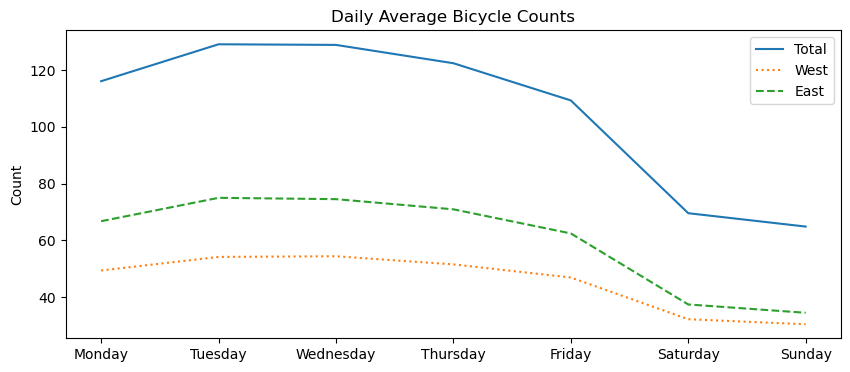

In [39]:
# We can also observe differences in traffic depending on day of week: Less traffic on weekends.
fig, ax = plt.subplots(figsize=(10, 4))

data_by_day_of_week = data_clean.groupby(data_clean.index.dayofweek).mean()
data_by_day_of_week.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_by_day_of_week.plot(ax=ax, style=['-', ':', '--'])
ax.set_title('Daily Average Bicycle Counts')
ax.set_ylabel('Count')
plt.show()

In [40]:
# The traffic pattern also is also different on weekend, there is only one peak on weekend days, compared to two peaks
# on week days.

weekday_or_weekend = np.where(data_clean.index.weekday < 5, 'Weekday', 'Weekend')
by_weekday_and_time = data_clean.groupby([weekday_or_weekend, data_clean.index.time]).mean()
by_weekday_and_time

Total        West        East
Weekday 00:00:00    8.245265    3.585892    4.659373
        01:00:00    4.116590    1.841607    2.274984
        02:00:00    2.770085    1.183867    1.586218
        03:00:00    2.389288    1.166884    1.222404
        04:00:00    7.175376    3.283148    3.892227
        05:00:00   28.850425   13.947420   14.903005
        06:00:00  102.075767   48.588831   53.486937
        07:00:00  256.636512  121.639778  134.996734
        08:00:00  360.546048  163.629001  196.917048
        09:00:00  202.207775   86.269520  115.938255
        10:00:00   96.870631   42.030382   54.840248
        11:00:00   79.361855   36.245918   43.115937
        12:00:00   84.202809   38.580013   45.622796
        13:00:00   90.089781   41.258897   48.830885
        14:00:00  102.808094   44.828329   57.979765
        15:00:00  145.912206   61.258812   84.653394
        16:00:00  261.543734   97.231723  164.312010
        17:00:00  440.206266  159.032963  281.173303
        18:00:00  296.251632  119.531332  176.720300
        19:00:00  146.790796   61.638381   85.152415
        20:00:00   83.147193   36.377285   46.769909
        21:00:00   52.214426   23.578003   28.636423
        22:00:00   32.830940   14.377611   18.453329
        23:00:00   20.050914    8.727807   11.323107
Weekend 00:00:00   14.995106    6.637031    8.358075
        01:00:00    8.749592    4.004894    4.744698
        02:00:00    5.638386    2.634267    3.004119
        03:00:00    3.170473    1.334421    1.836052
        04:00:00    3.463295    1.402121    2.061175
        05:00:00    6.905383    3.157423    3.747961
        06:00:00   16.730016    7.429853    9.300163
        07:00:00   31.839315   14.415987   17.423328
        08:00:00   59.296900   27.566069   31.730832
        09:00:00   84.179445   39.724307   44.455139
        10:00:00  106.858075   49.796085   57.061990
        11:00:00  131.670473   61.601142   70.069331
        12:00:00  146.098695   68.212887   77.885808
        13:00:00  153.960848   72.684339   81.276509
        14:00:00  159.039152   75.462480   83.576672
        15:00:00  155.254486   73.668842   81.585644
        16:00:00  141.562806   66.495106   75.067700
        17:00:00  115.658238   53.970636   61.687602
        18:00:00   88.673736   41.320555   47.353181
        19:00:00   63.953507   28.513051   35.440457
        20:00:00   42.858891   19.503263   23.355628
        21:00:00   32.945351   13.808320   19.137031
        22:00:00   22.013051    9.982055   12.030995
        23:00:00   16.443719    7.153344    9.290375

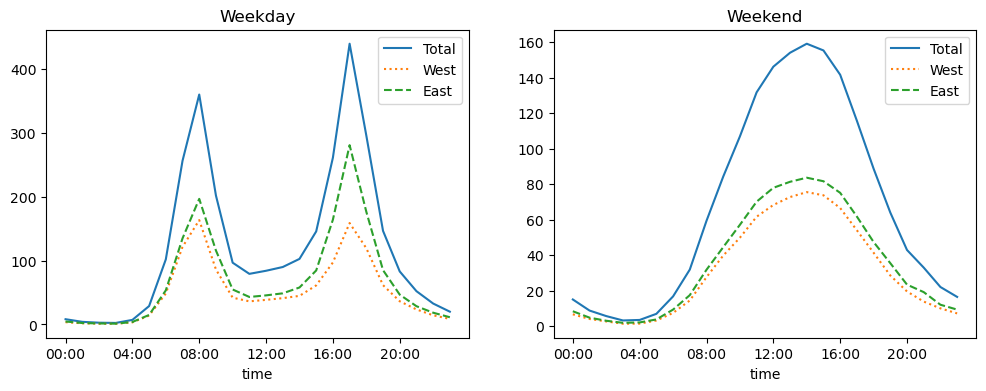

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_weekday_and_time.loc['Weekday'].plot(ax=axs[0], title='Weekday', xticks=hourly_ticks, style=['-', ':', '--'])
by_weekday_and_time.loc['Weekend'].plot(ax=axs[1], title='Weekend', xticks=hourly_ticks, style=['-', ':', '--'])
plt.show()